In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
from pathlib import Path

from tqdm.autonotebook import tqdm





In [ ]:
# The goal of this notebook is to pick a handful of households from
# the data set while ending up with as minimum Nan as possible!


In [28]:
# We are using already clean data.!
source_data = Path("./london_dataset/")
block_data_path = source_data/'halfhourly_dataset'/'halfhourly_dataset'

### Converting the half hourly block level dataset into a time series data 

Let's pick one block and see how we can transform the data.

In [24]:
block_1 = pd.read_csv(block_data_path/"block_1.csv", parse_dates=False)
block_1['tstp'] = pd.to_datetime(block_1['tstp'], yearfirst=True)
block_1.head()

# this is a sample from data!




block_2 = pd.read_csv(block_data_path/"block_2.csv", parse_dates=False)
block_2['tstp'] = pd.to_datetime(block_2['tstp'], yearfirst=True)
block_2.head()

# this is a sample from data!


,LCLid,tstp,energy(kWh/hh)
0,MAC000030,2011-12-07 11:30:00,0.398
1,MAC000030,2011-12-07 12:00:00,0.578
2,MAC000030,2011-12-07 12:30:00,0.049
3,MAC000030,2011-12-07 13:00:00,0.081
4,MAC000030,2011-12-07 13:30:00,0.094


In [25]:
dic1 = block_1.groupby('LCLid')['tstp'].agg(['min', 'max', 'count' ])
dic2 = block_2.groupby('LCLid')['tstp'].agg(['min', 'max', 'count' ])




In [26]:
pd.concat([dic1, dic2])

,min,max,count
LCLid,,,
MAC000323,2012-03-06 14:00:00,2014-02-28,34725
MAC000379,2012-03-12 15:30:00,2013-07-31,24250
MAC000386,2012-03-13 10:30:00,2014-02-28,34345
MAC000535,2012-04-10 10:00:00,2014-02-28,32902
MAC000557,2012-04-11 09:00:00,2014-02-28,32750
...,...,...,...
MAC005283,2012-02-10 16:00:00,2014-02-28,35917
MAC005406,2012-02-27 16:00:00,2014-02-28,35100
MAC005421,2012-02-29 10:30:00,2014-02-28,35012


In [4]:
# check for the NAN

check_nan = 0
for f in tqdm(block_data_path.glob("*.csv")):
    df = pd.read_csv(f, parse_dates=False, dtype=object)
    check_nan += df.isnull().sum().sum()
print(f"How many Nan did we have?: {check_nan}")
print('Data is clean!')
del df


112it [02:18,  1.23s/it]

How many Nan did we have?: 0
Data is clean!


In [29]:

# get the maximum and the length of each series:

# check for the NAN
list_data_prop = []
for f in tqdm(block_data_path.glob("*.csv")):
    df = pd.read_csv(f, parse_dates=False, dtype=object)
    df['tstp'] = pd.to_datetime(df['tstp'], yearfirst=True)
    

    list_data_prop.append(df.groupby('LCLid')['tstp'].agg(['min', 'max', 'count' ]))









112it [03:05,  1.65s/it]


In [30]:
df = pd.concat(list_data_prop)

df.head()

,min,max,count
LCLid,,,
MAC000127,2011-12-15 11:00:00,2014-02-28,38666
MAC000256,2011-12-05 09:00:00,2014-02-28,39151
MAC000390,2012-03-13 10:30:00,2014-02-28,34396
MAC000436,2012-03-22 10:30:00,2014-02-28,33957
MAC000484,2012-03-23 15:00:00,2014-02-28,33905


In [34]:
df['max'].value_counts().head()
# then decide and drop all the series that does not end in the max



max
2014-02-28    4987
2014-01-08      19
2013-11-23      18
2013-02-27      18
2014-02-14      12
Name: count, dtype: int64

In [35]:
# get only those IDs that match the required max
my_data = df [df['max'] == pd.to_datetime('2014-02-28 00:00:00')]

my_data



,min,max,count
LCLid,,,
MAC000127,2011-12-15 11:00:00,2014-02-28,38666
MAC000256,2011-12-05 09:00:00,2014-02-28,39151
MAC000390,2012-03-13 10:30:00,2014-02-28,34396
MAC000436,2012-03-22 10:30:00,2014-02-28,33957
MAC000484,2012-03-23 15:00:00,2014-02-28,33905
...,...,...,...
MAC004138,2012-05-21 08:00:00,2014-02-28,31082
MAC005207,2012-02-03 11:30:00,2014-02-28,36263
MAC005514,2012-04-17 10:30:00,2014-02-28,32668


<Axes: >

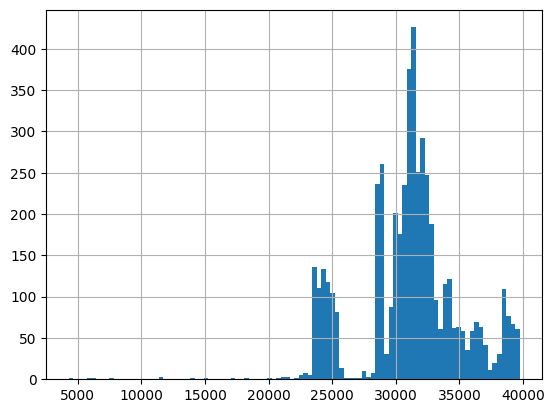

In [40]:
# pick the good length!
my_data['count'].hist(bins=100)


# it seems that most of the data have a length around 32 000
# find the corrosponding bin and all the IDs there
# later after loading the data we just cut it
# or right now find the corrosponding time then we need to extract the data
# for the given ID and min!!!

In [37]:
my_data['count'].mode()
# it seems that we have two modes!


0    28873
1    28874
Name: count, dtype: int64

In [39]:
my_data['count'].value_counts()

count
28874    11
28873    11
31274    10
31611    10
28872     9
         ..
28979     1
35307     1
28929     1
29151     1
32707     1
Name: count, Length: 2955, dtype: int64

In [15]:
# only selectd those IDs that have the desired length or are in that range!
# if we can have 500 would be good!
# drop others.
# once again go through the data and pick those ids. 
# put the date as the index like other papers
# save the results in a CSV format for the future!



How many Nan did we have?: 0


### Merging additional information

#### Household information

In [20]:
household_info = pd.read_csv(source_data/"informations_households.csv")
household_info.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [21]:
hhblock_df = hhblock_df.merge(household_info, on='LCLid', validate="one_to_one")
hhblock_df.head()

,LCLid,start_timestamp,frequency,energy_consumption,series_length,stdorToU,Acorn,Acorn_grouped,file
0,MAC000002,2012-10-13,30min,"[0.263, 0.2689999999999999, 0.275, 0.256, 0.21...",24144,Std,ACORN-A,Affluent,block_0
1,MAC000246,2012-01-01,30min,"[0.509, 0.317, 0.253, 0.249, 0.93, 0.607, 0.10...",37872,Std,ACORN-A,Affluent,block_0
2,MAC000450,2012-03-23,30min,"[1.337, 1.426, 0.996, 0.971, 0.994, 0.952, 0.8...",33936,Std,ACORN-A,Affluent,block_0
3,MAC001074,2012-05-09,30min,"[0.18, 0.086, 0.106, 0.173, 0.146, 0.223, 0.21...",31680,ToU,ACORN-,ACORN-,block_0
4,MAC003223,2012-09-18,30min,"[0.076, 0.079, 0.123, 0.109, 0.051, 0.069, 0.0...",25344,Std,ACORN-A,Affluent,block_0


#### Weather and Bank Holidays

In [22]:
bank_holidays = pd.read_csv(source_data/"uk_bank_holidays.csv", parse_dates=False)
bank_holidays['Bank holidays'] = pd.to_datetime(bank_holidays['Bank holidays'], yearfirst=True)
bank_holidays.set_index("Bank holidays", inplace=True)
bank_holidays.head()

,Type
Bank holidays,
2012-12-26,Boxing Day
2012-12-25,Christmas Day
2012-08-27,Summer bank holiday
2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
2012-04-06,Spring bank holiday (substitute day)


In [23]:
#Reindex on standard date range
bank_holidays = bank_holidays.resample("30min").asfreq()
bank_holidays = bank_holidays.groupby(bank_holidays.index.date).ffill().fillna("NO_HOLIDAY")
bank_holidays.index.name="datetime"
bank_holidays.head()

,Type
datetime,
2012-02-01 00:00:00,New Year?s Day (substitute day)
2012-02-01 00:30:00,New Year?s Day (substitute day)
2012-02-01 01:00:00,New Year?s Day (substitute day)
2012-02-01 01:30:00,New Year?s Day (substitute day)
2012-02-01 02:00:00,New Year?s Day (substitute day)


In [24]:
weather_hourly = pd.read_csv(source_data/"weather_hourly_darksky.csv", parse_dates=False)
weather_hourly['time'] = pd.to_datetime(weather_hourly['time'], yearfirst=True)
weather_hourly.set_index("time", inplace=True)
weather_hourly.head()

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
time,,,,,,,,,,,
2011-11-11 00:00:00,5.97,104,10.24,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
2011-11-11 01:00:00,4.88,99,9.76,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2011-11-11 02:00:00,3.70,98,9.46,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
2011-11-11 03:00:00,3.12,99,9.23,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
2011-11-11 04:00:00,1.85,111,9.26,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [25]:
#Resampling at 30min and forward fill
weather_hourly = weather_hourly.resample("30min").ffill()
weather_hourly.head()

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
time,,,,,,,,,,,
2011-11-01 00:00:00,13.63,160,13.49,11.48,1008.14,13.49,3.11,rain,clear-night,0.88,Clear
2011-11-01 00:30:00,13.63,160,13.49,11.48,1008.14,13.49,3.11,rain,clear-night,0.88,Clear
2011-11-01 01:00:00,13.26,154,12.73,11.58,1007.88,12.73,3.08,rain,partly-cloudy-night,0.93,Partly Cloudy
2011-11-01 01:30:00,13.26,154,12.73,11.58,1007.88,12.73,3.08,rain,partly-cloudy-night,0.93,Partly Cloudy
2011-11-01 02:00:00,12.94,161,13.65,12.14,1007.09,13.65,3.71,rain,clear-night,0.91,Clear


In [26]:
def map_weather_holidays(row):
    date_range = pd.date_range(row['start_timestamp'], periods=row['series_length'], freq=row['frequency'])
    std_df = pd.DataFrame(index=date_range)
    #Filling Na iwth NO_HOLIDAY cause rows before earliers holiday will be NaN
    holidays = std_df.join(bank_holidays, how="left").fillna("NO_HOLIDAY")
    weather = std_df.join(weather_hourly, how='left')
    assert len(holidays)==row['series_length'], "Length of holidays should be same as series length"
    assert len(weather)==row['series_length'], "Length of weather should be same as series length"
    row['holidays'] = holidays['Type'].values
    for col in weather:
        row[col] = weather[col].values
    return row

In [27]:
hhblock_df = hhblock_df.progress_apply(map_weather_holidays, axis=1)

hhblock_df.head()

  0%|          | 0/5560 [00:00<?, ?it/s]

,LCLid,start_timestamp,frequency,energy_consumption,series_length,stdorToU,Acorn,Acorn_grouped,file,holidays,...,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,MAC000002,2012-10-13,30min,"[0.263, 0.2689999999999999, 0.275, 0.256, 0.21...",24144,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[186, 186, 188, 188, 190, 190, 203, 203, 206, ...","[8.78, 8.78, 8.27, 8.27, 7.87, 7.87, 7.89, 7.8...","[6.28, 6.28, 6.21, 6.21, 6.22, 6.22, 6.76, 6.7...","[1007.7, 1007.7, 1007.36, 1007.36, 1006.73, 10...","[7.55, 7.55, 7.34, 7.34, 6.75, 6.75, 6.89, 6.8...","[2.28, 2.28, 1.81, 1.81, 1.95, 1.95, 1.83, 1.8...","[rain, rain, rain, rain, rain, rain, rain, rai...","[clear-night, clear-night, clear-night, clear-...","[0.84, 0.84, 0.87, 0.87, 0.89, 0.89, 0.93, 0.9...","[Clear, Clear, Clear, Clear, Partly Cloudy, Pa..."
1,MAC000246,2012-01-01,30min,"[0.509, 0.317, 0.253, 0.249, 0.93, 0.607, 0.10...",37872,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[229, 229, 238, 238, 229, 229, 231, 231, 227, ...","[12.12, 12.12, 12.59, 12.59, 12.45, 12.45, 12....","[10.97, 10.97, 11.02, 11.02, 11.04, 11.04, 10....","[1008.1, 1008.1, 1007.88, 1007.88, 1007.95, 10...","[12.12, 12.12, 12.59, 12.59, 12.45, 12.45, 12....","[5.9, 5.9, 6.06, 6.06, 5.31, 5.31, 4.68, 4.68,...","[rain, rain, rain, rain, rain, rain, rain, rai...","[partly-cloudy-night, partly-cloudy-night, clo...","[0.93, 0.93, 0.9, 0.9, 0.91, 0.91, 0.93, 0.93,...","[Mostly Cloudy, Mostly Cloudy, Overcast, Overc..."
2,MAC000450,2012-03-23,30min,"[1.337, 1.426, 0.996, 0.971, 0.994, 0.952, 0.8...",33936,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[78, 78, 73, 73, 81, 81, 80, 80, 75, 75, 71, 7...","[8.76, 8.76, 8.54, 8.54, 8.09, 8.09, 7.34, 7.3...","[7.25, 7.25, 7.12, 7.12, 7.17, 7.17, 6.68, 6.6...","[1027.41, 1027.41, 1026.91, 1026.91, 1026.54, ...","[7.59, 7.59, 7.43, 7.43, 7.24, 7.24, 7.34, 7.3...","[2.18, 2.18, 2.07, 2.07, 1.72, 1.72, 1.34, 1.3...","[rain, rain, rain, rain, rain, rain, rain, rai...","[fog, fog, fog, fog, fog, fog, fog, fog, fog, ...","[0.9, 0.9, 0.91, 0.91, 0.94, 0.94, 0.96, 0.96,...","[Foggy, Foggy, Foggy, Foggy, Foggy, Foggy, Fog..."
3,MAC001074,2012-05-09,30min,"[0.18, 0.086, 0.106, 0.173, 0.146, 0.223, 0.21...",31680,ToU,ACORN-,ACORN-,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[215, 215, 207, 207, 215, 215, 216, 216, 126, ...","[11.46, 11.46, 11.38, 11.38, 11.38, 11.38, 10....","[10.23, 10.23, 10.17, 10.17, 10.24, 10.24, 10....","[1007.39, 1007.39, 1007.21, 1007.21, 1007.06, ...","[11.46, 11.46, 11.38, 11.38, 11.38, 11.38, 10....","[2.35, 2.35, 2.15, 2.15, 1.84, 1.84, 1.22, 1.2...","[rain, rain, rain, rain, rain, rain, rain, rai...","[partly-cloudy-night, partly-cloudy-night, par...","[0.92, 0.92, 0.92, 0.92, 0.93, 0.93, 0.95, 0.9...","[Partly Cloudy, Partly Cloudy, Mostly Cloudy, ..."
4,MAC003223,2012-09-18,30min,"[0.076, 0.079, 0.123, 0.109, 0.051, 0.069, 0.0...",25344,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[236, 236, 240, 240, 242, 242, 244, 244, 248, ...","[14.06, 14.06, 13.12, 13.12, 12.53, 12.53, 12....","[10.82, 10.82, 10.29, 10.29, 9.86, 9.86, 9.83,...","[1011.09, 1011.09, 1010.82, 1010.82, 1010.65, ...","[14.06, 14.06, 13.12, 13.12, 12.53, 12.53, 12....","[3.86, 3.86, 3.81, 3.81, 4.27, 4.27, 4.12, 4.1...","[rain, rain, rain, rain, rain, rain, rain, rai...","[clear-night, clear-night, clear-night, clear-...","[0.81, 0.81, 0.83, 0.83, 0.84, 0.84, 0.86, 0.8...","[Clear, Clear, Clear, Clear, Clear, Clear, Par..."


In [28]:
del block_df, weather_hourly, bank_holidays, household_info

In [29]:
display(hhblock_df.memory_usage(deep=True))
print(f"Total: {hhblock_df.memory_usage(deep=True).sum()/1024**2} MB")

Index                   44480
LCLid                  366960
start_timestamp         44480
frequency              344720
energy_consumption     622720
series_length           44480
stdorToU               333600
Acorn                  355838
Acorn_grouped          367675
file                   361465
holidays               622720
visibility             622720
windBearing            622720
temperature            622720
dewPoint               622720
pressure               622720
apparentTemperature    622720
windSpeed              622720
precipType             622720
icon                   622720
humidity               622720
summary                622720
dtype: int64

Total: 9.879167556762695 MB


### Saving the file on disk

Saving the entire dataset in a ts file

In [ ]:
os.makedirs("data/london_smart_meters/preprocessed", exist_ok=True)

In [34]:
#Takes a long time to finish. Comment out and execute only if needed
# from src.utils.data_utils import write_compact_to_ts
# write_compact_to_ts(hhblock_df,
#        static_columns = ['LCLid', 'start_timestamp', 'frequency','series_length', 'stdorToU', 'Acorn', 'Acorn_grouped', 'file'], 
#        time_varying_columns = ['energy_consumption', 'holidays', 'visibility', 'windBearing', 'temperature', 'dewPoint',
#                               'pressure', 'apparentTemperature', 'windSpeed', 'precipType', 'icon','humidity', 'summary'],
#        filename=f"data/london_smart_meters/preprocessed/london_smart_meters_merged.ts",
#        sep=";",
#       chunk_size=1000)

Writing in Chunks...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:05<?, ?it/s]

  0%|          | 0/1000 [00:02<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/560 [00:00<?, ?it/s]

In [33]:
# Saving the LCLid - Acorn map as a pickle to be used later
hhblock_df[['LCLid',"file", "Acorn_grouped"]].to_pickle(f"data/london_smart_meters/preprocessed/london_smart_meters_lclid_acorn_map.pkl")

Saving blocks in 8 chunks as parquet

In [35]:
# Splitting the blocks into 8 chunks
blocks = [f"block_{i}" for i in range(111)]

n_chunks= 8
split_blocks = [blocks[i:i + n_chunks] for i in range(0, len(blocks), n_chunks)] 

In [36]:
#Writing each chunk to disk
for blk in tqdm(split_blocks):
    df = hhblock_df.loc[hhblock_df.file.isin(blk)]
    blk = [int(b.replace("block_","")) for b in blk]
    block_str = f"block_{min(blk)}-{max(blk)}"
    df.to_parquet(f"data/london_smart_meters/preprocessed/london_smart_meters_merged_{block_str}.parquet")

  0%|          | 0/14 [00:00<?, ?it/s]